<a href="https://colab.research.google.com/github/vinay010487/HardHatDetection/blob/main/Training_YOLOR_on_a_Custom_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Dependencies

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%pwd


'/content'

In [ ]:
# clone YOLOR repository
!git clone https://github.com/roboflow-ai/yolor
!mv "/content/yolor" "/content/gdrive/MyDrive/O_D"

fatal: destination path 'yolor' already exists and is not an empty directory.


In [ ]:
%pwd

In [ ]:
%cd /content/gdrive/MyDrive/O_D/yolor
!git reset --hard eb3ef0b7472413d6740f5cde39beb1a2f5b8b5d1

/content/gdrive/MyDrive/O_D/yolor
HEAD is now at eb3ef0b indentation


In [ ]:
# Install necessary dependencies
!pip install -qr requirements.txt

     |████████████████████████████████| 596 kB 4.2 MB/s 
     |████████████████████████████████| 776.7 MB 4.6 kB/s 
     |████████████████████████████████| 12.7 MB 99 kB/s 
     |████████████████████████████████| 1.5 MB 41.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.7.0 which is incompatible.


In [ ]:
# Install Mish CUDA
!git clone https://github.com/JunnYu/mish-cuda
%cd mish-cuda
!git reset --hard 6f38976064cbcc4782f4212d7c0c5f6dd5e315a8
!python setup.py build install
%cd ..

Cloning into 'mish-cuda'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 195 (delta 7), reused 79 (delta 3), pack-reused 107
Receiving objects: 100% (195/195), 208.77 KiB | 925.00 KiB/s, done.
Resolving deltas: 100% (56/56), done.
/content/gdrive/MyDrive/O_D/yolor/mish-cuda
HEAD is now at 6f38976 Update README.md
/usr/lib/python3.7/distutils/extension.py:131: UserWarning: Unknown Extension options: 'headers'
  warnings.warn(msg)
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/mish_cuda
copying src/mish_cuda/__init__.py -> build/lib.linux-x86_64-3.7/mish_cuda
running egg_info
creating src/mish_cuda.egg-info
writing src/mish_cuda.egg-info/PKG-INFO
writing dependency_links to src/mish_cuda.egg-info/dependency_links.txt
writing requirements to src/mish_cuda.egg-info/requires.txt
writing top-level names to src/mish_cuda

In [ ]:
# Install PyTorch Wavelets
!git clone https://github.com/fbcotter/pytorch_wavelets
%cd pytorch_wavelets
!pip install .
%cd ..

Cloning into 'pytorch_wavelets'...
remote: Enumerating objects: 972, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 972 (delta 75), reused 89 (delta 45), pack-reused 836
Receiving objects: 100% (972/972), 6.80 MiB | 8.58 MiB/s, done.
Resolving deltas: 100% (659/659), done.
Checking out files: 100% (121/121), done.
/content/gdrive/MyDrive/O_D/yolor/pytorch_wavelets
Processing /content/gdrive/MyDrive/O_D/yolor/pytorch_wavelets
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for pytorch-wavelets: filename=pytorch_wavelets-1.3.0-py3-none-any.whl size=54869 sha256=

# Download Correctly Formatted Custom Dataset 

We'll download our dataset from Roboflow. Use the "**YOLOv5 PyTorch**" export format. Note that the Ultralytics implementation calls for a YAML file defining where your training and test data is. The Roboflow export also writes this format for us.

To get your data into Roboflow, follow the [Getting Started Guide](https://blog.roboflow.ai/getting-started-with-roboflow/).

![YOLOv5 PyTorch export](https://i.imgur.com/5vr9G2u.png)


In [ ]:
%cd /content/
!curl -L "https://app.roboflow.com/ds/tKml49J1aH?key=veN0dWfvpm" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip


Streaming output truncated to the last 5000 lines.
 extracting: train/labels/003643_jpg.rf.628d20b31e284f572ac9e63700820c07.txt  
 extracting: train/labels/003643_jpg.rf.92db7b9d9e7f08b27059b73029c79521.txt  
 extracting: train/labels/003644_jpg.rf.c39775556ccc2693d1e6f62cf06cf537.txt  
 extracting: train/labels/003644_jpg.rf.f9a01e98a5e1618df3176bac0384601e.txt  
 extracting: train/labels/003645_jpg.rf.ab765295144e65e294962ac0a4fcc601.txt  
 extracting: train/labels/003645_jpg.rf.e914fa348274c01f708959bf8d1bf57c.txt  
 extracting: train/labels/003646_jpg.rf.209e6adac854c742c4182d743a2c6db4.txt  
 extracting: train/labels/003646_jpg.rf.ec90262e6fa869c0409c86295ce6e98c.txt  
 extracting: train/labels/003647_jpg.rf.7aad54b5589a8d0c0ba449a5542de0a5.txt  
 extracting: train/labels/003647_jpg.rf.b6f4504169d811eac07dc6187eb19872.txt  
 extracting: train/labels/003648_jpg.rf.12e0a9b6d40faf6e7ad9c0db527db54e.txt  
 extracting: train/labels/003648_jpg.rf.532374a21aae956d5de6de36896bb202.txt  
 

In [ ]:
%cat data.yaml

train: ../train/images
val: ../valid/images

nc: 2
names: ['head', 'helmet']

In [ ]:
!mv "/content/data.yaml" "/content/gdrive/MyDrive/O_D/yolor"

In [ ]:
!mv "/content/test" "/content/gdrive/MyDrive/O_D"
!mv "/content/train" "/content/gdrive/MyDrive/O_D"
!mv "/content/valid" "/content/gdrive/MyDrive/O_D"

# Prepare Pre-Trained Weights for YOLOR

In [ ]:
%cd /content/gdrive/MyDrive/O_D/yolor
!bash scripts/get_pretrain.sh

/content/gdrive/MyDrive/O_D/yolor
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1545      0 --:--:-- --:--:-- --:--:--  1539
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  142M  100  142M    0     0  27.2M      0  0:00:05  0:00:05 --:--:-- 40.9M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1478      0 --:--:-- --:--:-- --:--:--  1478
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  305M  100  305M    0     0  31.7M      0  0:00:09  0:00:09 --:--:-- 38.1M


# Write YOLOR Configuration

In [ ]:
import yaml
with open('/content/gdrive/MyDrive/O_D/yolor/data.yaml') as f:
    dataMap = yaml.safe_load(f)

num_classes = len(dataMap['names'])
num_filters = (num_classes + 5) * 3
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
#@title YOLOR Architecture - Double click on this line in the code cell. { display-mode: "form" }
%%writetemplate /content/gdrive/MyDrive/Dev/YOLOR_Training/yolor/cfg/yolor_p6.cfg

[net]
batch=64
subdivisions=8
width=1280
height=1280
channels=3
momentum=0.949
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.00261
burn_in=1000
max_batches = 500500
policy=steps
steps=400000,450000
scales=.1,.1

mosaic=1


# ============ Backbone ============ #

# Stem 

# P1

# Downsample

# 0
[reorg]

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=silu


# P2

# Downsample

[convolutional]
batch_normalize=1
filters=128
size=3
stride=2
pad=1
activation=silu

# Split

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=silu

[route]
layers = -2

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=silu

# Residual Block

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

# Transition first
#
#[convolutional]
#batch_normalize=1
#filters=64
#size=1
#stride=1
#pad=1
#activation=silu

# Merge [-1, -(3k+3)]

[route]
layers = -1,-12

# Transition last

# 16 (previous+6+3k)
[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu


# P3

# Downsample

[convolutional]
batch_normalize=1
filters=256
size=3
stride=2
pad=1
activation=silu

# Split

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

[route]
layers = -2

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

# Residual Block

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

# Transition first
#
#[convolutional]
#batch_normalize=1
#filters=128
#size=1
#stride=1
#pad=1
#activation=silu

# Merge [-1, -(3k+3)]

[route]
layers = -1,-24

# Transition last

# 43 (previous+6+3k)
[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu


# P4

# Downsample

[convolutional]
batch_normalize=1
filters=384
size=3
stride=2
pad=1
activation=silu

# Split

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[route]
layers = -2

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

# Residual Block

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=192
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=192
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=192
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=192
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=192
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=192
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=192
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

# Transition first
#
#[convolutional]
#batch_normalize=1
#filters=192
#size=1
#stride=1
#pad=1
#activation=silu

# Merge [-1, -(3k+3)]

[route]
layers = -1,-24

# Transition last

# 70 (previous+6+3k)
[convolutional]
batch_normalize=1
filters=384
size=1
stride=1
pad=1
activation=silu


# P5

# Downsample

[convolutional]
batch_normalize=1
filters=512
size=3
stride=2
pad=1
activation=silu

# Split

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

[route]
layers = -2

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

# Residual Block

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

# Transition first
#
#[convolutional]
#batch_normalize=1
#filters=256
#size=1
#stride=1
#pad=1
#activation=silu

# Merge [-1, -(3k+3)]

[route]
layers = -1,-12

# Transition last

# 85 (previous+6+3k)
[convolutional]
batch_normalize=1
filters=512
size=1
stride=1
pad=1
activation=silu


# P6

# Downsample

[convolutional]
batch_normalize=1
filters=640
size=3
stride=2
pad=1
activation=silu

# Split

[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

[route]
layers = -2

[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

# Residual Block

[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=320
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=320
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=320
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

# Transition first
#
#[convolutional]
#batch_normalize=1
#filters=320
#size=1
#stride=1
#pad=1
#activation=silu

# Merge [-1, -(3k+3)]

[route]
layers = -1,-12

# Transition last

# 100 (previous+6+3k)
[convolutional]
batch_normalize=1
filters=640
size=1
stride=1
pad=1
activation=silu

# ============ End of Backbone ============ #

# ============ Neck ============ #

# CSPSPP

[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

[route]
layers = -2

[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=320
activation=silu

[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

### SPP ###
[maxpool]
stride=1
size=5

[route]
layers=-2

[maxpool]
stride=1
size=9

[route]
layers=-4

[maxpool]
stride=1
size=13

[route]
layers=-1,-3,-5,-6
### End SPP ###

[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=320
activation=silu

[route]
layers = -1, -13

# 115 (previous+6+5+2k)
[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

# End of CSPSPP


# FPN-5

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

[upsample]
stride=2

[route]
layers = 85

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

[route]
layers = -1, -3

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

# Split

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

[route]
layers = -2

# Plain Block

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=256
activation=silu

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=256
activation=silu

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=256
activation=silu

# Merge [-1, -(2k+2)]

[route]
layers = -1, -8

# Transition last

# 131 (previous+6+4+2k)
[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu


# FPN-4

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[upsample]
stride=2

[route]
layers = 70

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[route]
layers = -1, -3

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

# Split

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[route]
layers = -2

# Plain Block

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=192
activation=silu

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=192
activation=silu

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=192
activation=silu

# Merge [-1, -(2k+2)]

[route]
layers = -1, -8

# Transition last

# 147 (previous+6+4+2k)
[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu


# FPN-3

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

[upsample]
stride=2

[route]
layers = 43

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

[route]
layers = -1, -3

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

# Split

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

[route]
layers = -2

# Plain Block

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=128
activation=silu

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=128
activation=silu

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=128
activation=silu

# Merge [-1, -(2k+2)]

[route]
layers = -1, -8

# Transition last

# 163 (previous+6+4+2k)
[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu


# PAN-4

[convolutional]
batch_normalize=1
size=3
stride=2
pad=1
filters=192
activation=silu

[route]
layers = -1, 147

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

# Split

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[route]
layers = -2

# Plain Block

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=192
activation=silu

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=192
activation=silu

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=192
activation=silu

[route]
layers = -1,-8

# Transition last

# 176 (previous+3+4+2k)
[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu


# PAN-5

[convolutional]
batch_normalize=1
size=3
stride=2
pad=1
filters=256
activation=silu

[route]
layers = -1, 131

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

# Split

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

[route]
layers = -2

# Plain Block

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=256
activation=silu

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=256
activation=silu

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=256
activation=silu

[route]
layers = -1,-8

# Transition last

# 189 (previous+3+4+2k)
[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu


# PAN-6

[convolutional]
batch_normalize=1
size=3
stride=2
pad=1
filters=320
activation=silu

[route]
layers = -1, 115

[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

# Split

[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

[route]
layers = -2

# Plain Block

[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=320
activation=silu

[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=320
activation=silu

[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=320
activation=silu

[route]
layers = -1,-8

# Transition last

# 202 (previous+3+4+2k)
[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

# ============ End of Neck ============ #

# 203
[implicit_add]
filters=256

# 204
[implicit_add]
filters=384

# 205
[implicit_add]
filters=512

# 206
[implicit_add]
filters=640

# 207
[implicit_mul]
filters={num_filters}

# 208
[implicit_mul]
filters={num_filters}

# 209
[implicit_mul]
filters={num_filters}

# 210
[implicit_mul]
filters={num_filters}

# ============ Head ============ #

# YOLO-3

[route]
layers = 163

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=256
activation=silu

[shift_channels]
from=203

[convolutional]
size=1
stride=1
pad=1
filters={num_filters}
activation=linear

[control_channels]
from=207

[yolo]
mask = 0,1,2
anchors = 19,27,  44,40,  38,94,  96,68,  86,152,  180,137,  140,301,  303,264,  238,542,  436,615,  739,380,  925,792
classes={num_classes}
num=12
jitter=.3
ignore_thresh = .7
truth_thresh = 1
random=1
scale_x_y = 1.05
iou_thresh=0.213
cls_normalizer=1.0
iou_normalizer=0.07
iou_loss=ciou
nms_kind=greedynms
beta_nms=0.6


# YOLO-4

[route]
layers = 176

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=384
activation=silu

[shift_channels]
from=204

[convolutional]
size=1
stride=1
pad=1
filters={num_filters}
activation=linear

[control_channels]
from=208

[yolo]
mask = 3,4,5
anchors = 19,27,  44,40,  38,94,  96,68,  86,152,  180,137,  140,301,  303,264,  238,542,  436,615,  739,380,  925,792
classes={num_classes}
num=12
jitter=.3
ignore_thresh = .7
truth_thresh = 1
random=1
scale_x_y = 1.05
iou_thresh=0.213
cls_normalizer=1.0
iou_normalizer=0.07
iou_loss=ciou
nms_kind=greedynms
beta_nms=0.6


# YOLO-5

[route]
layers = 189

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=512
activation=silu

[shift_channels]
from=205

[convolutional]
size=1
stride=1
pad=1
filters={num_filters}
activation=linear

[control_channels]
from=209

[yolo]
mask = 6,7,8
anchors = 19,27,  44,40,  38,94,  96,68,  86,152,  180,137,  140,301,  303,264,  238,542,  436,615,  739,380,  925,792
classes={num_classes}
num=12
jitter=.3
ignore_thresh = .7
truth_thresh = 1
random=1
scale_x_y = 1.05
iou_thresh=0.213
cls_normalizer=1.0
iou_normalizer=0.07
iou_loss=ciou
nms_kind=greedynms
beta_nms=0.6


# YOLO-6

[route]
layers = 202

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=640
activation=silu

[shift_channels]
from=206

[convolutional]
size=1
stride=1
pad=1
filters={num_filters}
activation=linear

[control_channels]
from=210

[yolo]
mask = 9,10,11
anchors = 19,27,  44,40,  38,94,  96,68,  86,152,  180,137,  140,301,  303,264,  238,542,  436,615,  739,380,  925,792
classes={num_classes}
num=12
jitter=.3
ignore_thresh = .7
truth_thresh = 1
random=1
scale_x_y = 1.05
iou_thresh=0.213
cls_normalizer=1.0
iou_normalizer=0.07
iou_loss=ciou
nms_kind=greedynms
beta_nms=0.6

# ============ End of Head ============ #

In [ ]:
%cat /content/gdrive/MyDrive/O_D/yolor/cfg/yolor_p6.cfg

[net]
batch=64
subdivisions=8
width=1280
height=1280
channels=3
momentum=0.949
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.00261
burn_in=1000
max_batches = 500500
policy=steps
steps=400000,450000
scales=.1,.1

mosaic=1


# ============ Backbone ============ #

# Stem 

# P1

# Downsample

# 0
[reorg]

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=silu


# P2

# Downsample

[convolutional]
batch_normalize=1
filters=128
size=3
stride=2
pad=1
activation=silu

# Split

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=silu

[route]
layers = -2

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=silu

# Residual Block

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=64
size=1


# Train Custom YOLOR Detector

### Next, we'll fire off training!


Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** set the path to our yaml file
- **cfg:** specify our model configuration
- **weights:** specify a custom path to weights. (Note: We can specify the pretrained weights we downloaded up above with the shell script)
- **name:** result names
-**hyp:** Define the hyperparamters for training

In [ ]:
%cd /content/gdrive/MyDrive/O_D/yolor
!python train.py --batch-size 8 --img 416 416 --data '/content/gdrive/MyDrive/O_D/yolor/data.yaml' --cfg cfg/yolor_p6.cfg --weights '/content/gdrive/MyDrive/O_D/yolor/yolor_p6.pt' --device 0 --name yolor_p6 --hyp '/content/gdrive/MyDrive/O_D/yolor/data/hyp.scratch.1280.yaml' --epochs 30

/content/gdrive/MyDrive/O_D/yolor
Using torch 1.7.0 CUDA:0 (Tesla K80, 11441MB)

Namespace(adam=False, batch_size=8, bucket='', cache_images=False, cfg='cfg/yolor_p6.cfg', data='/content/gdrive/MyDrive/O_D/yolor/data.yaml', device='0', epochs=30, evolve=False, exist_ok=False, global_rank=-1, hyp='/content/gdrive/MyDrive/O_D/yolor/data/hyp.scratch.1280.yaml', image_weights=False, img_size=[416, 416], local_rank=-1, log_imgs=16, multi_scale=False, name='yolor_p6', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/yolor_p6', single_cls=False, sync_bn=False, total_batch_size=8, weights='/content/gdrive/MyDrive/O_D/yolor/yolor_p6.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 0.05, 'cls': 0.5, 'c

# Evaluate Custom YOLOR Detector Performance

Training losses and performance metrics are saved to Tensorboard and also to a logfile defined above with the **--name** flag when we train. In our case, we named this `yolor_p6`. (If given no name, it defaults to `results.txt`.) The results file is plotted as a png after training completes.

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

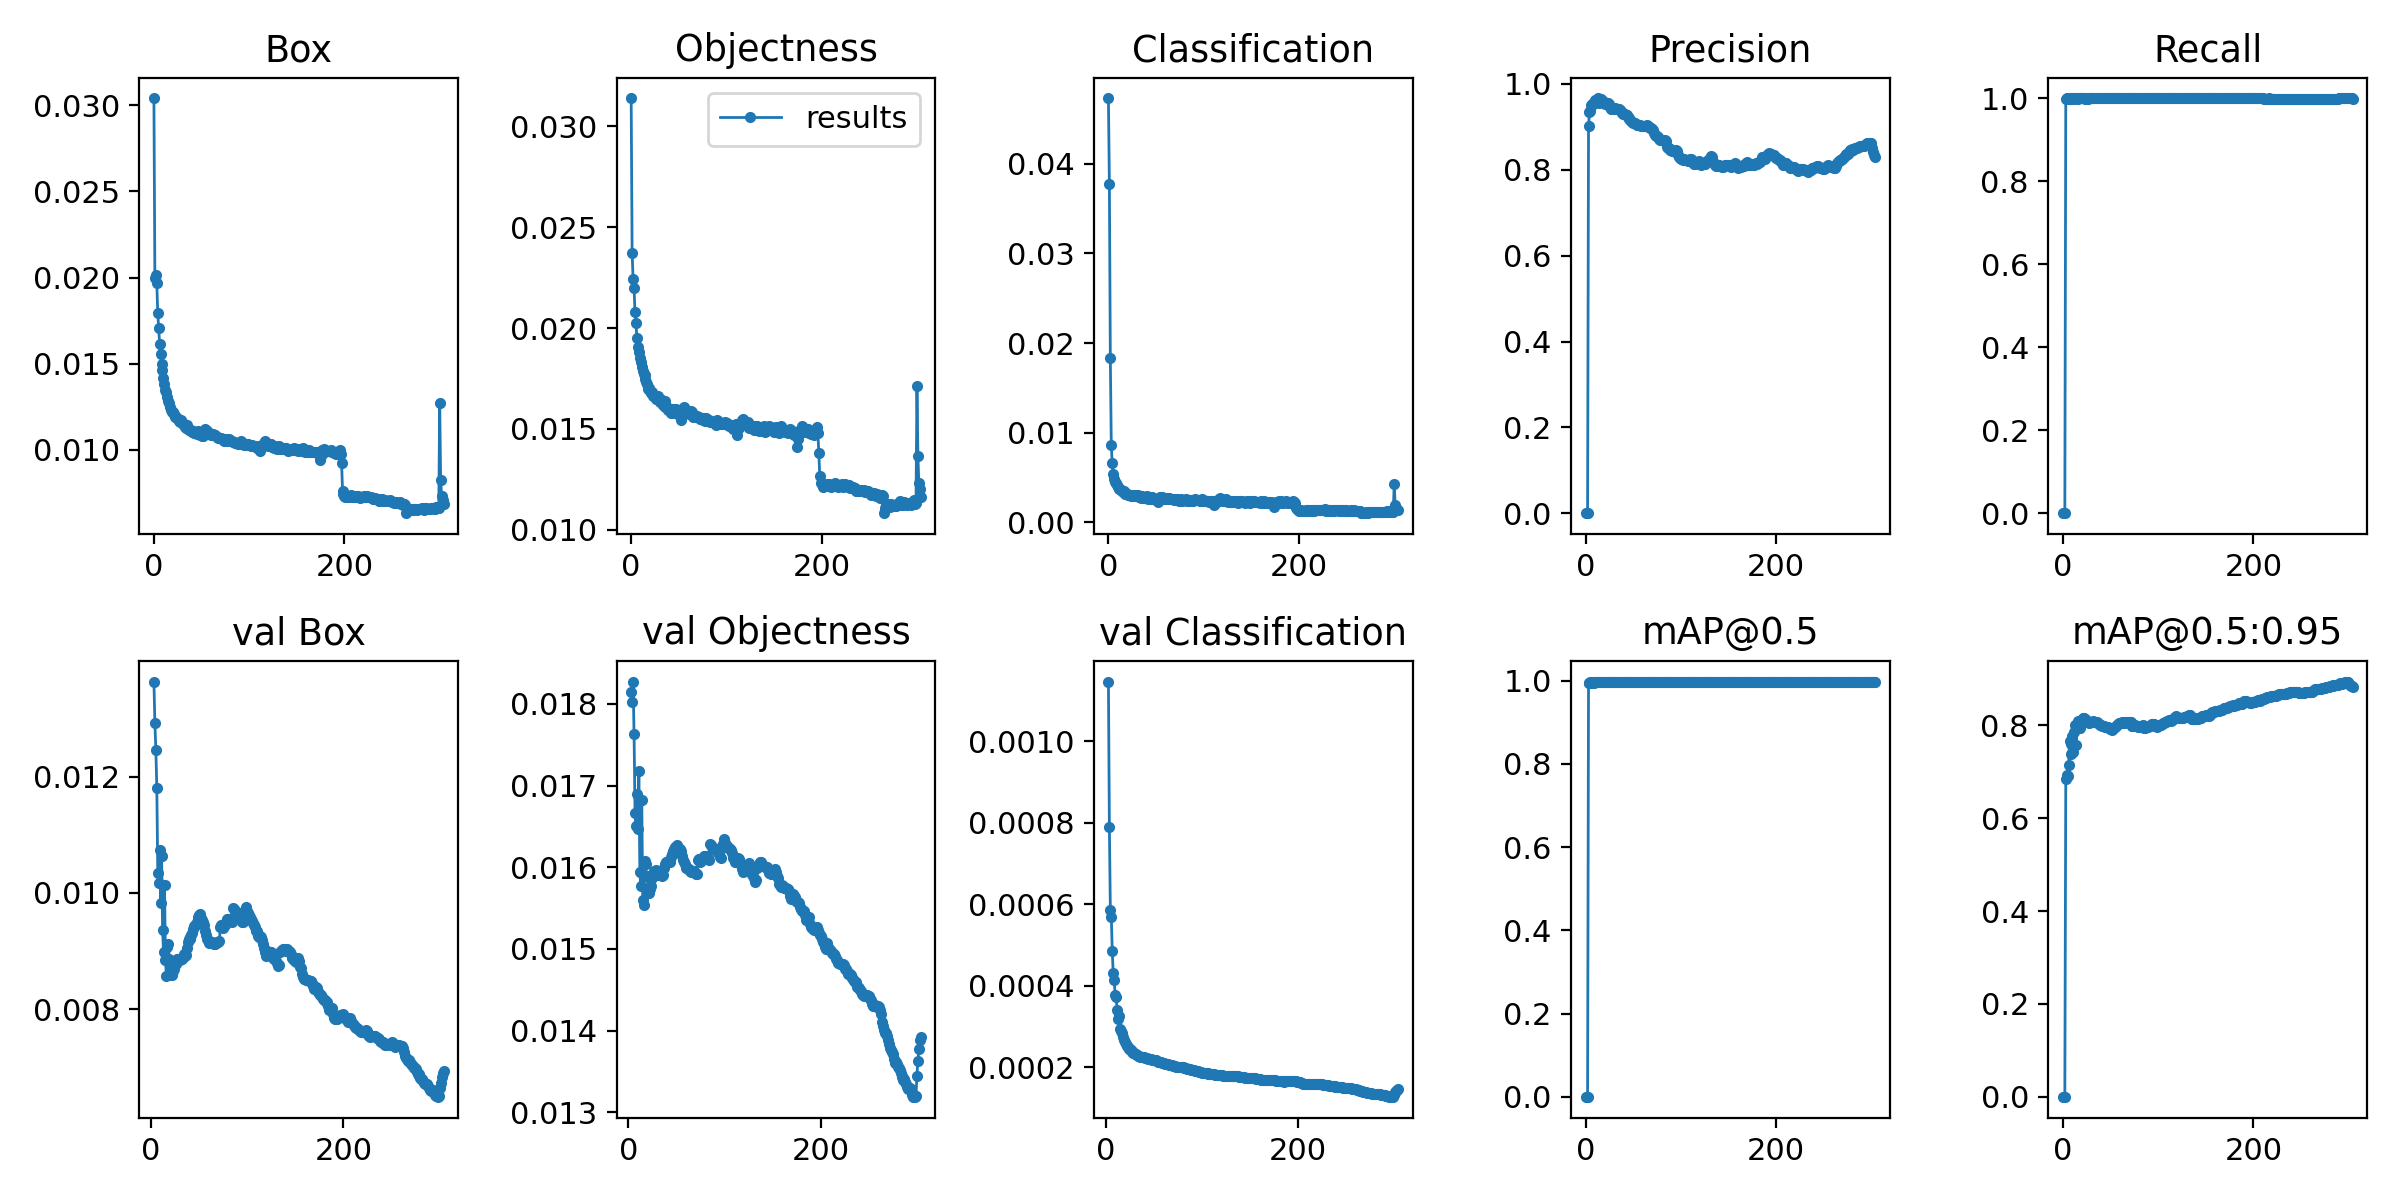

In [ ]:
from IPython.display import Image
# we can also output some older school graphs if the tensor board isn't working for whatever reason... 
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/gdrive/MyDrive/Dev/YOLOR_Training/yolor/runs/train/yolor_p619/results.png', width=1000)  # view results.png

GROUND TRUTH TRAINING DATA:


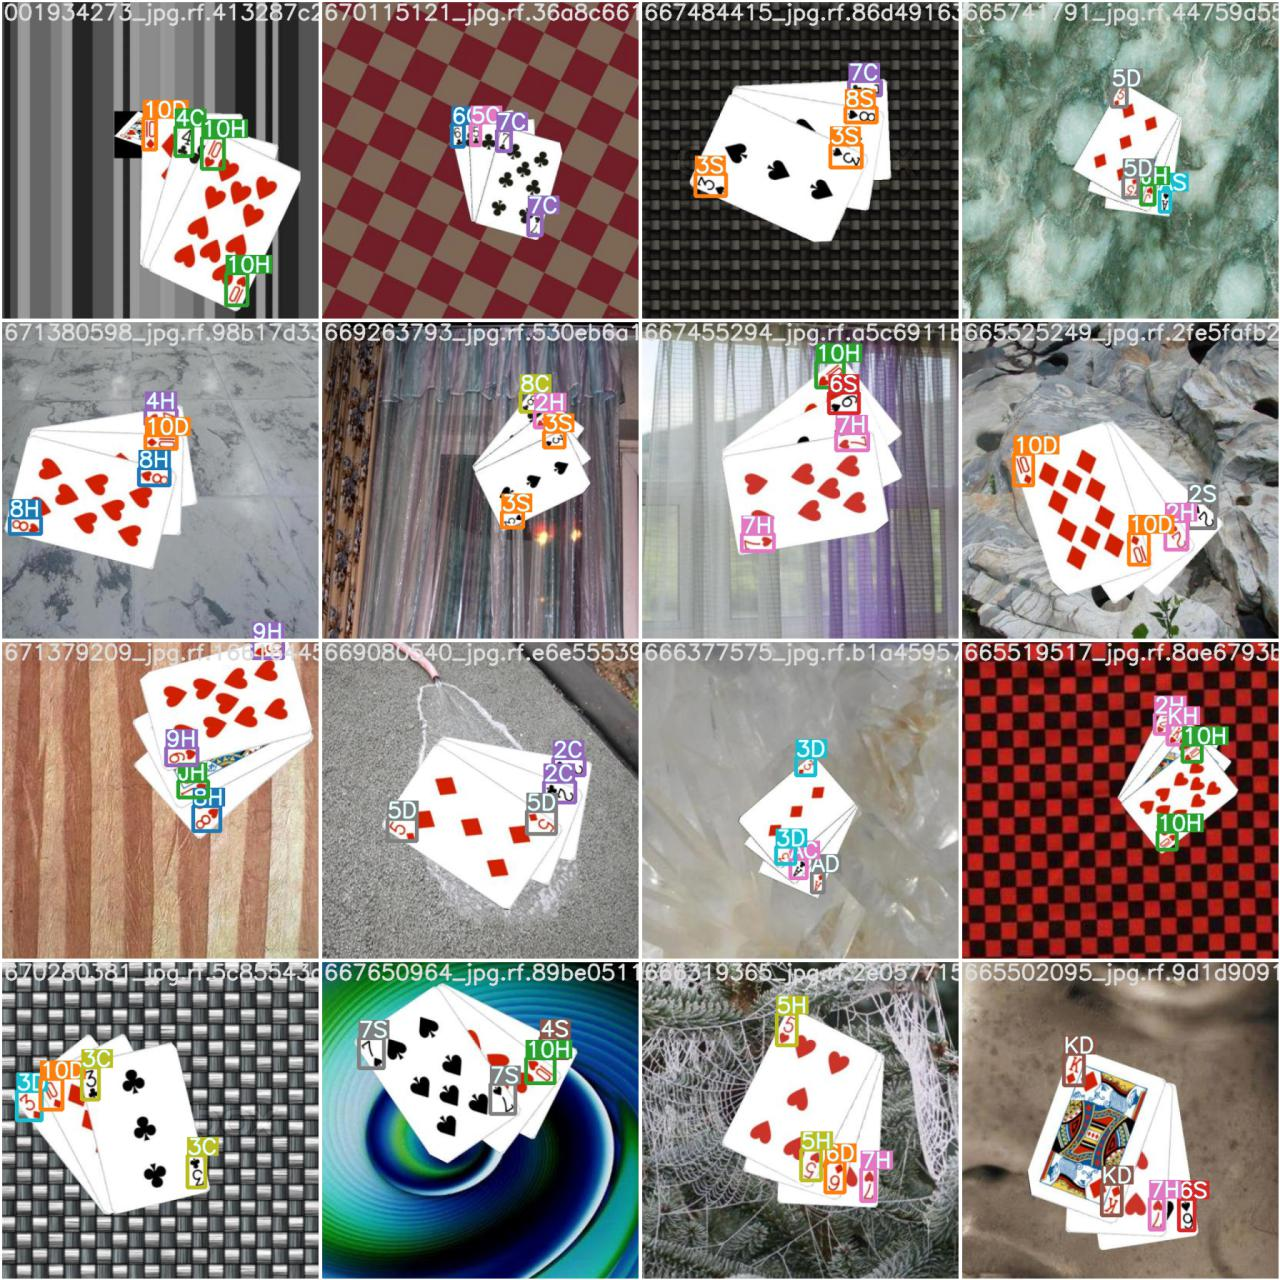

In [ ]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/gdrive/MyDrive/Dev/YOLOR_Training/yolor/runs/train/yolor_p619/test_batch0_labels.jpg', width=900)

AUGMENTED DATA:


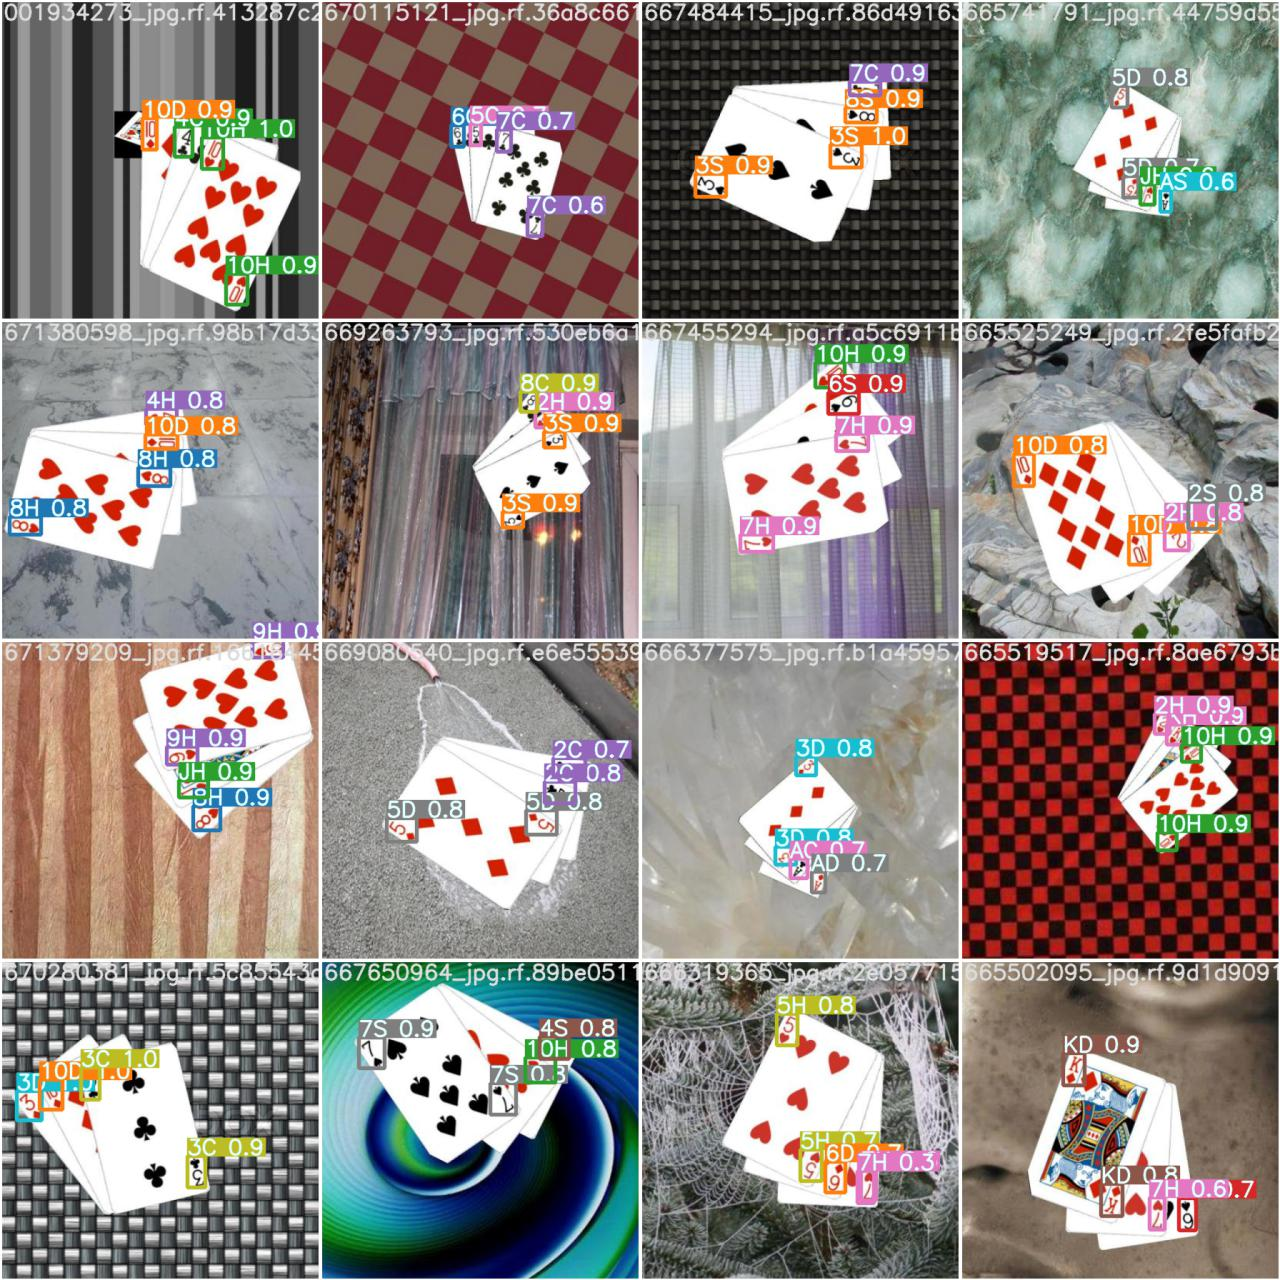

In [ ]:
print("AUGMENTED DATA:")
Image(filename='/content/gdrive/MyDrive/Dev/YOLOR_Training/yolor/runs/train/yolor_p619/test_batch0_pred.jpg', width=900)

#Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.

In [ ]:
# trained weights are saved by default in our weights folder
%ls runs/

train/


In [ ]:
%ls runs/train/yolor_p6/weights

In [ ]:
# Create names file for model
import yaml
import ast
with open("/content/gdrive/MyDrive/Dev/YOLOR_Training/yolor/data.yaml", 'r') as stream:
    names = str(yaml.safe_load(stream)['names'])

namesFile = open("../data.names", "w+")
names = ast.literal_eval(names)
for name in names:
  namesFile.write(name +'\n')
namesFile.close()

In [ ]:
!python detect.py --weights "/content/gdrive/MyDrive/Dev/YOLOR_Training/yolor/runs/train/yolor_p619/weights/best_overall.pt" --conf 0.5 --source ../test/images --names ../data.names --cfg cfg/yolor_p6.cfg

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolor_p6.cfg', classes=None, conf_thres=0.5, device='', img_size=1280, iou_thres=0.5, names='../data.names', output='inference/output', save_txt=False, source='../test/images', update=False, view_img=False, weights=['/content/gdrive/MyDrive/Dev/YOLOR_Training/yolor/runs/train/yolor_p619/weights/best_overall.pt'])
image 1/1010 /content/gdrive/MyDrive/Dev/YOLOR_Training/test/images/001771721_jpg.rf.9c091ba4aa4801f02613985a891f7f08.jpg: 1280x1280 2 7Ss, 1 8Ss, 1 AHs, Done. (0.060s)
image 2/1010 /content/gdrive/MyDrive/Dev/YOLOR_Training/test/images/001783412_jpg.rf.472d068913adefc398a94c5a8d85802d.jpg: 1280x1280 1 3Ss, 1 5Cs, 2 8Cs, Done. (0.059s)
image 3/1010 /content/gdrive/MyDrive/Dev/YOLOR_Training/test/images/002352486_jpg.rf.6c0add986cd793c2e3cba20150a5771a.jpg: 1280x1280 Done. (0.058s)
image 4/1010 /content/gdrive/MyDrive/Dev/YOLOR_Training/test/images/003123257_jpg.rf.a630f42c62a5acd5e5737a92f42fb203.jpg: 1280x1280 2 3Cs, 1 6Hs

In [ ]:
#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/gdrive/MyDrive/Dev/YOLOR_Training/yolor/inference/output/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# Export Trained Weights for Future Inference

Now that you have trained your custom detector, you can export the trained weights you have made here for inference on your device elsewhere

In [ ]:
%cp /content/yolor/runs/train/yolor_p6/weights/best.pt /content/gdrive/My\ Drive



---


# **Code for Resuming Training**
Implement this section of the code, incase your runtime disconnects and you lose your progress. We save our model to Google Drive so that we can retrieve and load our progress and resume training.

**Requirements for this to run smoothly:**

*   Colab PRO - Faster and Reliable Training - \$9pm

*   Google Drive One Plan - More Training Space (100GB) - \$1-\$2pm




In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/Dev/YOLOR_Training/yolor
!git reset --hard eb3ef0b7472413d6740f5cde39beb1a2f5b8b5d1

/content/gdrive/MyDrive/Dev/YOLOR_Training/yolor
HEAD is now at eb3ef0b indentation


In [ ]:
# Install necessary dependencies
!pip install -qr requirements.txt

     |████████████████████████████████| 636 kB 5.0 MB/s 
     |████████████████████████████████| 776.7 MB 3.7 kB/s 
     |████████████████████████████████| 12.7 MB 22.4 MB/s 
     |████████████████████████████████| 1.5 MB 45.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.7.0 which is incompatible.


In [ ]:
#For resuming training
%cd mish-cuda
!git reset --hard 6f38976064cbcc4782f4212d7c0c5f6dd5e315a8
!python setup.py build install
%cd ..

/content/gdrive/My Drive/Dev/YOLOR_Training/yolor/mish-cuda
HEAD is now at 6f38976 Update README.md
/usr/lib/python3.7/distutils/extension.py:131: UserWarning: Unknown Extension options: 'headers'
  warnings.warn(msg)
running build
running build_py
copying src/mish_cuda/__init__.py -> build/lib.linux-x86_64-3.7/mish_cuda
running egg_info
writing src/mish_cuda.egg-info/PKG-INFO
writing dependency_links to src/mish_cuda.egg-info/dependency_links.txt
writing requirements to src/mish_cuda.egg-info/requires.txt
writing top-level names to src/mish_cuda.egg-info/top_level.txt
/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py:339: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
adding license file 'LICENSE'
writing manifest file 'src/mish_cuda.egg-info/SOURCES.txt'
running build_ext
building 'mish_cuda._C' extension
x86_64-l

In [ ]:
#For Resuming Training
%cd pytorch_wavelets
!pip install .
%cd ..

/content/gdrive/My Drive/Dev/YOLOR_Training/yolor/pytorch_wavelets
Processing /content/gdrive/My Drive/Dev/YOLOR_Training/yolor/pytorch_wavelets
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for pytorch-wavelets: filename=pytorch_wavelets-1.3.0-py3-none-any.whl size=54869 sha256=498a464dd5ad4104fe5254de6ff753cdd868484d4ab7194f013b7cebb4705ce8
  Stored in directory: /tmp/pip-ephem-wheel-cache-_c5yhzgo/wheels/a1/03/36/793375851b17ff8f5266a1288a4e67ec1e324a3b046d30d419
Successfully built pytorch-wavelets
/content/gdrive/My Drive/Dev/YOLOR_Training/yolor


In [ ]:
%cd /content/
!curl -L "https://app.roboflow.com/ds/W5O949HRUK?key=Z2DWeDtAac" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
%cat data.yaml

Streaming output truncated to the last 5000 lines.
 extracting: train/labels/975040689_jpg.rf.146eacd4628f4bc8c0f53733a2e1be89.txt  
 extracting: train/labels/975040689_jpg.rf.7e2507f49dbddc01eff6d823fbc02994.txt  
 extracting: train/labels/975040689_jpg.rf.b48bd8579d826c9d0718df2a99d389a9.txt  
 extracting: train/labels/975040689_jpg.rf.b56c189b86f2c2eb8a33c75f07b32723.txt  
 extracting: train/labels/975040689_jpg.rf.bac70c2d53ff2f75815a0fa11d3bf580.txt  
 extracting: train/labels/975131450_jpg.rf.21fbbcf971ff7ec6f04e579e36717a04.txt  
 extracting: train/labels/975131450_jpg.rf.25771afd6288078af74a8cc97867c6f7.txt  
 extracting: train/labels/975131450_jpg.rf.69e9bdbb6ef2b4c22312adcffead7c0c.txt  
 extracting: train/labels/975131450_jpg.rf.b331b35f537dc432ed98dffada816c89.txt  
 extracting: train/labels/975131450_jpg.rf.e762f72a43c1004a04c957109faad25b.txt  
 extracting: train/labels/975336801_jpg.rf.656af099ad15ad9323da096a414b8d0c.txt  
 extracting: train/labels/975336801_jpg.rf.6ec6

In [ ]:
!mv "/content/test" "/content/gdrive/MyDrive/Dev/YOLOR_Training"
!mv "/content/train" "/content/gdrive/MyDrive/Dev/YOLOR_Training"
!mv "/content/valid" "/content/gdrive/MyDrive/Dev/YOLOR_Training"

mv: inter-device move failed: '/content/test' to '/content/gdrive/MyDrive/Dev/YOLOR_Training/test'; unable to remove target: Directory not empty
mv: inter-device move failed: '/content/train' to '/content/gdrive/MyDrive/Dev/YOLOR_Training/train'; unable to remove target: Directory not empty
mv: inter-device move failed: '/content/valid' to '/content/gdrive/MyDrive/Dev/YOLOR_Training/valid'; unable to remove target: Directory not empty


In [ ]:
import yaml
with open('/content/data.yaml') as f:
    dataMap = yaml.safe_load(f)

num_classes = len(dataMap['names'])
num_filters = (num_classes + 5) * 3
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
#@title YOLOR Model Architecture - Double click on this line in the code cell. { display-mode: "form" }
%%writetemplate /content/gdrive/MyDrive/Dev/YOLOR_Training/yolor/cfg/yolor_p6.cfg

[net]
batch=64
subdivisions=8
width=1280
height=1280
channels=3
momentum=0.949
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.00261
burn_in=1000
max_batches = 500500
policy=steps
steps=400000,450000
scales=.1,.1

mosaic=1


# ============ Backbone ============ #

# Stem 

# P1

# Downsample

# 0
[reorg]

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=silu


# P2

# Downsample

[convolutional]
batch_normalize=1
filters=128
size=3
stride=2
pad=1
activation=silu

# Split

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=silu

[route]
layers = -2

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=silu

# Residual Block

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

# Transition first
#
#[convolutional]
#batch_normalize=1
#filters=64
#size=1
#stride=1
#pad=1
#activation=silu

# Merge [-1, -(3k+3)]

[route]
layers = -1,-12

# Transition last

# 16 (previous+6+3k)
[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu


# P3

# Downsample

[convolutional]
batch_normalize=1
filters=256
size=3
stride=2
pad=1
activation=silu

# Split

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

[route]
layers = -2

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

# Residual Block

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

# Transition first
#
#[convolutional]
#batch_normalize=1
#filters=128
#size=1
#stride=1
#pad=1
#activation=silu

# Merge [-1, -(3k+3)]

[route]
layers = -1,-24

# Transition last

# 43 (previous+6+3k)
[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu


# P4

# Downsample

[convolutional]
batch_normalize=1
filters=384
size=3
stride=2
pad=1
activation=silu

# Split

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[route]
layers = -2

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

# Residual Block

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=192
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=192
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=192
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=192
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=192
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=192
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=192
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

# Transition first
#
#[convolutional]
#batch_normalize=1
#filters=192
#size=1
#stride=1
#pad=1
#activation=silu

# Merge [-1, -(3k+3)]

[route]
layers = -1,-24

# Transition last

# 70 (previous+6+3k)
[convolutional]
batch_normalize=1
filters=384
size=1
stride=1
pad=1
activation=silu


# P5

# Downsample

[convolutional]
batch_normalize=1
filters=512
size=3
stride=2
pad=1
activation=silu

# Split

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

[route]
layers = -2

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

# Residual Block

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

# Transition first
#
#[convolutional]
#batch_normalize=1
#filters=256
#size=1
#stride=1
#pad=1
#activation=silu

# Merge [-1, -(3k+3)]

[route]
layers = -1,-12

# Transition last

# 85 (previous+6+3k)
[convolutional]
batch_normalize=1
filters=512
size=1
stride=1
pad=1
activation=silu


# P6

# Downsample

[convolutional]
batch_normalize=1
filters=640
size=3
stride=2
pad=1
activation=silu

# Split

[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

[route]
layers = -2

[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

# Residual Block

[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=320
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=320
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=320
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

# Transition first
#
#[convolutional]
#batch_normalize=1
#filters=320
#size=1
#stride=1
#pad=1
#activation=silu

# Merge [-1, -(3k+3)]

[route]
layers = -1,-12

# Transition last

# 100 (previous+6+3k)
[convolutional]
batch_normalize=1
filters=640
size=1
stride=1
pad=1
activation=silu

# ============ End of Backbone ============ #

# ============ Neck ============ #

# CSPSPP

[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

[route]
layers = -2

[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=320
activation=silu

[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

### SPP ###
[maxpool]
stride=1
size=5

[route]
layers=-2

[maxpool]
stride=1
size=9

[route]
layers=-4

[maxpool]
stride=1
size=13

[route]
layers=-1,-3,-5,-6
### End SPP ###

[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=320
activation=silu

[route]
layers = -1, -13

# 115 (previous+6+5+2k)
[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

# End of CSPSPP


# FPN-5

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

[upsample]
stride=2

[route]
layers = 85

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

[route]
layers = -1, -3

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

# Split

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

[route]
layers = -2

# Plain Block

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=256
activation=silu

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=256
activation=silu

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=256
activation=silu

# Merge [-1, -(2k+2)]

[route]
layers = -1, -8

# Transition last

# 131 (previous+6+4+2k)
[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu


# FPN-4

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[upsample]
stride=2

[route]
layers = 70

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[route]
layers = -1, -3

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

# Split

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[route]
layers = -2

# Plain Block

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=192
activation=silu

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=192
activation=silu

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=192
activation=silu

# Merge [-1, -(2k+2)]

[route]
layers = -1, -8

# Transition last

# 147 (previous+6+4+2k)
[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu


# FPN-3

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

[upsample]
stride=2

[route]
layers = 43

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

[route]
layers = -1, -3

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

# Split

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

[route]
layers = -2

# Plain Block

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=128
activation=silu

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=128
activation=silu

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=128
activation=silu

# Merge [-1, -(2k+2)]

[route]
layers = -1, -8

# Transition last

# 163 (previous+6+4+2k)
[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=silu


# PAN-4

[convolutional]
batch_normalize=1
size=3
stride=2
pad=1
filters=192
activation=silu

[route]
layers = -1, 147

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

# Split

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[route]
layers = -2

# Plain Block

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=192
activation=silu

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=192
activation=silu

[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=192
activation=silu

[route]
layers = -1,-8

# Transition last

# 176 (previous+3+4+2k)
[convolutional]
batch_normalize=1
filters=192
size=1
stride=1
pad=1
activation=silu


# PAN-5

[convolutional]
batch_normalize=1
size=3
stride=2
pad=1
filters=256
activation=silu

[route]
layers = -1, 131

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

# Split

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

[route]
layers = -2

# Plain Block

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=256
activation=silu

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=256
activation=silu

[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=256
activation=silu

[route]
layers = -1,-8

# Transition last

# 189 (previous+3+4+2k)
[convolutional]
batch_normalize=1
filters=256
size=1
stride=1
pad=1
activation=silu


# PAN-6

[convolutional]
batch_normalize=1
size=3
stride=2
pad=1
filters=320
activation=silu

[route]
layers = -1, 115

[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

# Split

[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

[route]
layers = -2

# Plain Block

[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=320
activation=silu

[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=320
activation=silu

[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=320
activation=silu

[route]
layers = -1,-8

# Transition last

# 202 (previous+3+4+2k)
[convolutional]
batch_normalize=1
filters=320
size=1
stride=1
pad=1
activation=silu

# ============ End of Neck ============ #

# 203
[implicit_add]
filters=256

# 204
[implicit_add]
filters=384

# 205
[implicit_add]
filters=512

# 206
[implicit_add]
filters=640

# 207
[implicit_mul]
filters={num_filters}

# 208
[implicit_mul]
filters={num_filters}

# 209
[implicit_mul]
filters={num_filters}

# 210
[implicit_mul]
filters={num_filters}

# ============ Head ============ #

# YOLO-3

[route]
layers = 163

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=256
activation=silu

[shift_channels]
from=203

[convolutional]
size=1
stride=1
pad=1
filters={num_filters}
activation=linear

[control_channels]
from=207

[yolo]
mask = 0,1,2
anchors = 19,27,  44,40,  38,94,  96,68,  86,152,  180,137,  140,301,  303,264,  238,542,  436,615,  739,380,  925,792
classes={num_classes}
num=12
jitter=.3
ignore_thresh = .7
truth_thresh = 1
random=1
scale_x_y = 1.05
iou_thresh=0.213
cls_normalizer=1.0
iou_normalizer=0.07
iou_loss=ciou
nms_kind=greedynms
beta_nms=0.6


# YOLO-4

[route]
layers = 176

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=384
activation=silu

[shift_channels]
from=204

[convolutional]
size=1
stride=1
pad=1
filters={num_filters}
activation=linear

[control_channels]
from=208

[yolo]
mask = 3,4,5
anchors = 19,27,  44,40,  38,94,  96,68,  86,152,  180,137,  140,301,  303,264,  238,542,  436,615,  739,380,  925,792
classes={num_classes}
num=12
jitter=.3
ignore_thresh = .7
truth_thresh = 1
random=1
scale_x_y = 1.05
iou_thresh=0.213
cls_normalizer=1.0
iou_normalizer=0.07
iou_loss=ciou
nms_kind=greedynms
beta_nms=0.6


# YOLO-5

[route]
layers = 189

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=512
activation=silu

[shift_channels]
from=205

[convolutional]
size=1
stride=1
pad=1
filters={num_filters}
activation=linear

[control_channels]
from=209

[yolo]
mask = 6,7,8
anchors = 19,27,  44,40,  38,94,  96,68,  86,152,  180,137,  140,301,  303,264,  238,542,  436,615,  739,380,  925,792
classes={num_classes}
num=12
jitter=.3
ignore_thresh = .7
truth_thresh = 1
random=1
scale_x_y = 1.05
iou_thresh=0.213
cls_normalizer=1.0
iou_normalizer=0.07
iou_loss=ciou
nms_kind=greedynms
beta_nms=0.6


# YOLO-6

[route]
layers = 202

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=640
activation=silu

[shift_channels]
from=206

[convolutional]
size=1
stride=1
pad=1
filters={num_filters}
activation=linear

[control_channels]
from=210

[yolo]
mask = 9,10,11
anchors = 19,27,  44,40,  38,94,  96,68,  86,152,  180,137,  140,301,  303,264,  238,542,  436,615,  739,380,  925,792
classes={num_classes}
num=12
jitter=.3
ignore_thresh = .7
truth_thresh = 1
random=1
scale_x_y = 1.05
iou_thresh=0.213
cls_normalizer=1.0
iou_normalizer=0.07
iou_loss=ciou
nms_kind=greedynms
beta_nms=0.6

# ============ End of Head ============ #

In [ ]:
%cat /content/gdrive/MyDrive/Dev/YOLOR_Training/yolor/cfg/yolor_p6.cfg


[net]
batch=64
subdivisions=8
width=1280
height=1280
channels=3
momentum=0.949
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.00261
burn_in=1000
max_batches = 500500
policy=steps
steps=400000,450000
scales=.1,.1

mosaic=1


# ============ Backbone ============ #

# Stem 

# P1

# Downsample

# 0
[reorg]

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=silu


# P2

# Downsample

[convolutional]
batch_normalize=1
filters=128
size=3
stride=2
pad=1
activation=silu

# Split

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=silu

[route]
layers = -2

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=silu

# Residual Block

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=silu

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=silu

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=64
size=1

In [ ]:
%cd /content/gdrive/MyDrive/Dev/YOLOR_Training/yolor
!python train.py --batch-size 8 --img 416 416 --data '/content/gdrive/MyDrive/Dev/YOLOR_Training/yolor/data.yaml' --cfg cfg/yolor_p6.cfg --weights '/content/gdrive/MyDrive/Dev/YOLOR_Training/yolor/runs/train/yolor_p615/weights/last_299.pt' --device 0 --name yolor_p6 --hyp '/content/gdrive/MyDrive/Dev/YOLOR_Training/yolor/data/hyp.scratch.1280.yaml' --epochs 305

/content/gdrive/MyDrive/Dev/YOLOR_Training/yolor
Using torch 1.7.0 CUDA:0 (Tesla P100-PCIE-16GB, 16280MB)

Namespace(adam=False, batch_size=8, bucket='', cache_images=False, cfg='cfg/yolor_p6.cfg', data='/content/gdrive/MyDrive/Dev/YOLOR_Training/yolor/data.yaml', device='0', epochs=305, evolve=False, exist_ok=False, global_rank=-1, hyp='/content/gdrive/MyDrive/Dev/YOLOR_Training/yolor/data/hyp.scratch.1280.yaml', image_weights=False, img_size=[416, 416], local_rank=-1, log_imgs=16, multi_scale=False, name='yolor_p6', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/yolor_p619', single_cls=False, sync_bn=False, total_batch_size=8, weights='/content/gdrive/MyDrive/Dev/YOLOR_Training/yolor/runs/train/yolor_p615/weights/last_299.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
2021-08-11 14:12:19.596112: I tensorflow/stream_executor/platform/default/dso

# **Conclusion**

If you enjoyed this tutorial and want more on **YOLOR** then:

💻Get Started with YOLOR [Get Started](https://augmentedstartups.info/YOLOR-Get-Started). <br>
⭐ Download the Code at the [AI Vision Store](https://augmentedstartups.info/VisionStore)<br>
☕ Show your support with [Chai/Coffee](https://bit.ly/BuymeaCoffeeAS)

![picture](https://drive.google.com/uc?export=view&id=1cTMSbjs6rCAx_tRnJGZz_niZgpBuiDT0)